Space & Time

Stability and the CFL Condtition

Following Module_2.01 we will experiment with the grid size and step


In [48]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [51]:
def linearconv(nx):
    """Solve the linear convection equation.
    nx is the number of internal grid points
    returns: none"""
    
    dx = 2/(nx-1)
    nt = 20
    dt = .025 #20 timesteps taken
    c = 1 #wavespeed set to 1
    
    x = numpy.linspace(0,2,nx) #domain x in [0,2]
    
    u = numpy.ones(nx)
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    u[numpy.intersect1d(lbound, ubound)]=2
    
    un = numpy.ones(nx)
    
    for n in range(nt):
        un = u.copy()
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1])
        u[0] = 1.0
        
    pyplot.plot(x, u, color='#003366', ls='--', lw=3)
    pyplot.ylim(0, 2.5);

TypeError: 'tuple' object is not callable

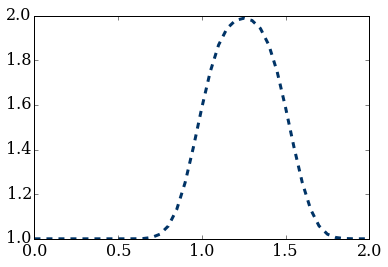

In [52]:
linearconv(41) #convection using 41 grid points

TypeError: 'tuple' object is not callable

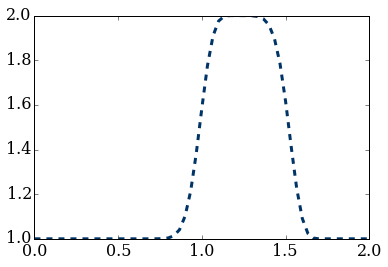

In [53]:
linearconv(61)

TypeError: 'tuple' object is not callable

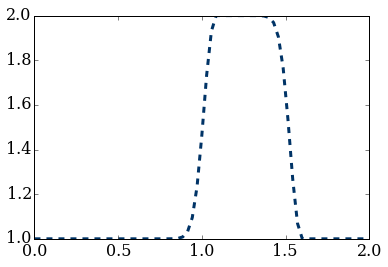

In [54]:
linearconv(71)

TypeError: 'tuple' object is not callable

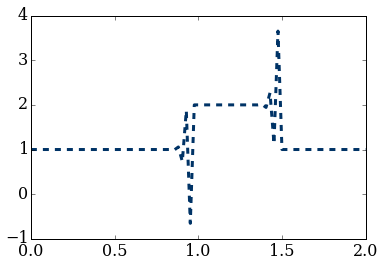

In [55]:
linearconv(85)

The graph above is known to be unstable because the wave is traveling a distance which is greater than $\Delta x$ in the given time period $\Delta t$

Graphical interpretation of the CFL condition

numerical domain of dependance:
$$\sigma = \frac{c \Delta t}{\Delta x} \leq 1$$

This is known as the Courant-Friedrichs-Lewy number (CFL), often denoted by $\sigma$ For our system of forward-time/backward-space scheme, the condition for stability is $\sigma < 1$

In [56]:
def linearconv(nx):
    dx = 2/(nx-1)
    nt = 20
    c = 1
    sigma = .5
    x = numpy.linspace(0,2,nx)
    
    dt = sigma*dx
    
    u = numpy.ones(nx)
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    u[numpy.intersect1d(lbound, ubound)] = 2
    
    un = numpy.ones(nx)
    
    for n in range(nt):
        un = u.copy()
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1])
        u[0] = 1.0
        
    pyplot.plot(x, u, color='#003366', ls='--', lw=3)
    pyplot.ylim(0, 2.5)

TypeError: 'tuple' object is not callable

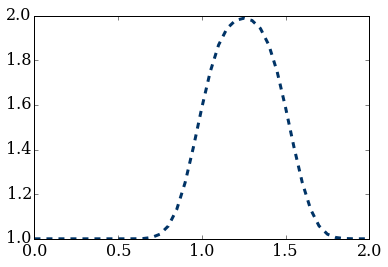

In [57]:
#Now solution will always be stable no matter how many spatial points we use!
linearconv(41)

TypeError: 'tuple' object is not callable

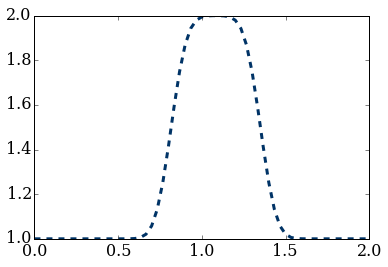

In [58]:
linearconv(61)

TypeError: 'tuple' object is not callable

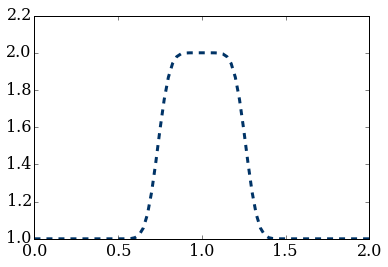

In [59]:
linearconv(81)

TypeError: 'tuple' object is not callable

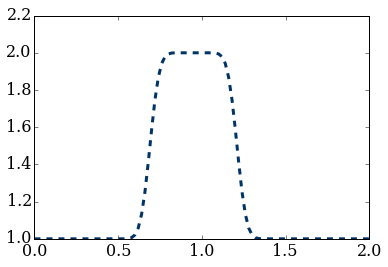

In [60]:
linearconv(101)

TypeError: 'tuple' object is not callable

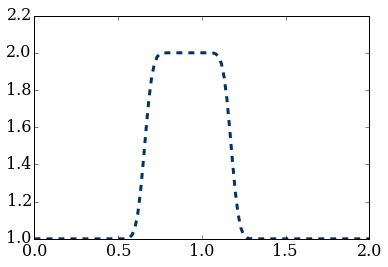

In [61]:
linearconv(121)

As the number of points nx increases, the wave convects a shorter and shorter distance. Depending on our value nx and corresponding dt, dx a shorter time window is being examined over time.